In [21]:
# In this weeks Python sessions we’ll look at how we can feed our data into some ML code to get
# a decision tree going which can help us with categorisation problems, but in a way that’s maybe,
# more visually tractable.

# Here’s a link, again, to the google developers course on machine learning, but specifically to
# decision trees: https://developers.google.com/machine-learning/decision-forests/decision-trees
# It’s not required reading but it’ll help and will clear up things that I’m not always the best
# at explaining live, whilst also trying to remember code!

In [22]:
import pandas as pd
import numpy as np
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [23]:
col_names = ['preg', 'glu', 'bp', 'skin', 'insulin', 'bmi', 'dp', 'age', 'label']
 
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv',
                 names=col_names,
                 skiprows=1)
 
df.head()

,preg,glu,bp,skin,insulin,bmi,dp,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
imp = SimpleImputer(strategy='mean')
 
empty_data_cols = col_names[1:-1]
 
df[empty_data_cols] = df[empty_data_cols].replace(0, np.nan)
 
for col in empty_data_cols:
    df[col] = imp.fit_transform(df[col].values.reshape(-1, 1))
 
df.head(20)

,preg,glu,bp,skin,insulin,bmi,dp,age,label
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0,1


In [25]:
features = col_names[:-1]
X = df[features]
y = df['label']
 
X

# https://scikit-learn.org/stable/modules/impute.html

,preg,glu,bp,skin,insulin,bmi,dp,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0


In [26]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
 
clf = DecisionTreeClassifier()
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix')

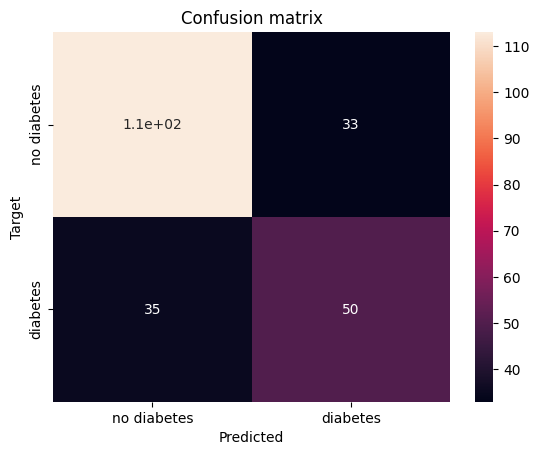

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
 
cm = metrics.confusion_matrix(y_test, y_pred)
 
sns.heatmap(cm,
            annot=True,
            xticklabels=['no diabetes', 'diabetes'],
            yticklabels=['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [28]:
from sklearn.metrics import classification_report
 
target_names = ['no diabetes', 'diabetes']
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
 
output_report

{'no diabetes': {'precision': 0.7635135135135135,
  'recall': 0.773972602739726,
  'f1-score': 0.7687074829931972,
  'support': 146.0},
 'diabetes': {'precision': 0.6024096385542169,
  'recall': 0.5882352941176471,
  'f1-score': 0.5952380952380952,
  'support': 85.0},
 'accuracy': 0.7056277056277056,
 'macro avg': {'precision': 0.6829615760338652,
  'recall': 0.6811039484286865,
  'f1-score': 0.6819727891156462,
  'support': 231.0},
 'weighted avg': {'precision': 0.7042328668834693,
  'recall': 0.7056277056277056,
  'f1-score': 0.704876755897164,
  'support': 231.0}}

In [30]:
%pip install graphviz
%pip install pydotplus
# %conda install graphviz

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
 
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_names)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


InvocationException: GraphViz's executables not found

Text(0.5, 1.0, 'Confusion matrix')

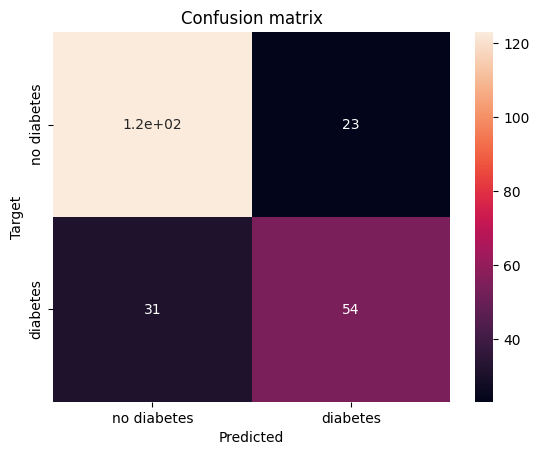

In [11]:
# accuracy': 0.7186147186147186
 
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3
                             )
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
 
# output_report
 
import matplotlib.pyplot as plt
import seaborn as sns
 
cm = metrics.confusion_matrix(y_test, y_pred)
 
sns.heatmap(cm,
            annot=True,
            xticklabels=['no diabetes', 'diabetes'],
            yticklabels=['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [ ]:
# https://github.com/data-to-insight/D2I-Jupyter-Notebook-Tools/blob/main/ml-data%20science%20tutorials/decision%20tree.ipynb

In [25]:
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_names)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Note: you may need to restart the kernel to use updated packages.


InvocationException: GraphViz's executables not found